In [67]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
%pylab inline
%matplotlib inline

path_dataset_folder = "../dataset/"
path_dataset_train = path_dataset_folder + "training.csv"
path_dataset_train_simplified = path_dataset_folder + "training_simplified.csv"
path_dataset_test = path_dataset_folder + "test.csv"

print("Hello")
print(os.listdir(path_dataset_folder))

#left_eye_center,
#right_eye_center,
#left_eye_inner_corner,
#left_eye_outer_corner,
#right_eye_inner_corner,
#right_eye_outer_corner,
#left_eyebrow_inner_end,
#left_eyebrow_outer_end,
#right_eyebrow_inner_end,
#right_eyebrow_outer_end,
#nose_tip,
#mouth_left_corner,
#mouth_right_corner,
#mouth_center_top_lip,
#mouth_center_bottom_lip

#train = pd.read_csv(path_dataset_train)
# 15 Keypoints
# Train has 7049 images
# Test has 1783 images -> 27124 keypoints to predict
# Images are 96x96

#simplified = train.drop(columns = ["Image"])
#simplified.to_csv(path_dataset_folder + "training_simplified.csv")

train = pd.read_csv(path_dataset_train_simplified)

#print(train.loc[0])
#for c in train.loc[0][1:]:
#    print("c: ", c)
    
train_path_format = "../images/train/{}_img.png"
test_path_format = "../images/test/{}_img.png"

def add_points(data, index):
    print("index", train.loc[index][0])
    points = train.loc[index][1:]
    for c in range(0, len(points), 2):
        x = points[c]
        y = points[c + 1]
        circle = plt.Circle((x, y), radius=1.5, fc='r')
        plt.gca().add_patch(circle)

def show_image(data, path, index):
    img = plt.imread(path.format(index))
    print(img.shape)
    plt.imshow(img,cmap='gray')
    add_points(data, index)
    
# Show the image
for i in range(0, 3):
    show_image(train, train_path_format, i)
    plt.show()

In [21]:

path_dataset_folder = "../dataset/"
path_dataset_train_simplified = path_dataset_folder + "training_simplified.csv"

data = pd.read_csv(path_dataset_train_simplified)
column_names = [c for c in data]

boxes = []
for i in range(1, len(column_names), 2):
    x_name = column_names[i]
    y_name = column_names[i + 1]
    
    upper = (data[x_name].max(), data[y_name].max())
    lower = (data[x_name].min(), data[y_name].min())
    
    uw = upper[0] - lower[0]
    uh = upper[1] - lower[1]
    
    boxes.append((lower, upper))
    print("{} {} -> max {} min {} w: {}, h: {}".format(x_name, y_name, upper, lower, uw, uh))




left_eye_center_x left_eye_center_y -> max (94.689279999999997, 80.502649027200007) min (22.7633446452, 1.6165120000000002) w: 71.9259353548, h: 78.88613702720001
right_eye_center_x right_eye_center_y -> max (85.0393813333, 81.270910505800003) min (0.68659199999999998, 4.0912639999999998) w: 84.3527893333, h: 77.17964650580001
left_eye_inner_corner_x left_eye_inner_corner_y -> max (84.440991228299978, 66.562559293800007) min (19.0649535927, 27.190098113200001) w: 65.37603763559997, h: 39.372461180600006
left_eye_outer_corner_x left_eye_outer_corner_y -> max (95.258090377599999, 64.618230116000007) min (27.571878985999998, 26.250022641499999) w: 67.6862113916, h: 38.36820747450001
right_eye_inner_corner_x right_eye_inner_corner_y -> max (70.714965986300001, 69.808803088600001) min (5.7510462174399999, 26.250022641499999) w: 64.96391976886, h: 43.558780447100006
right_eye_outer_corner_x right_eye_outer_corner_y -> max (61.428580498999999, 70.746796690500005) min (3.9801169835799999, 25.1

Populating the interactive namespace from numpy and matplotlib


/Users/goncalopalaio/anaconda/envs/kaggle/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


batch_size: 1 total batches 7049
(96, 96, 3)


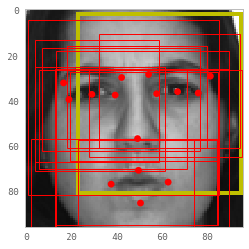

(96, 96, 3)


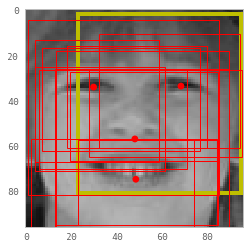

(96, 96, 3)


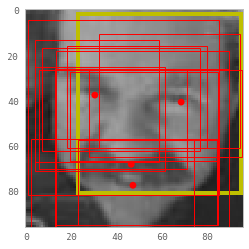

(96, 96, 3)


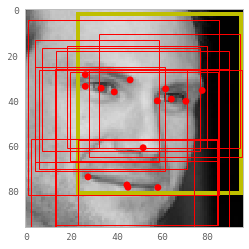

(96, 96, 3)


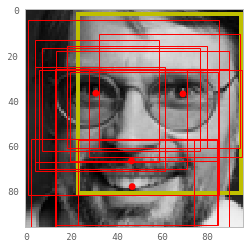

In [28]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
%pylab inline
%matplotlib inline

import common as cm

loader = cm.BatchDataLoader(train_val_split = 1.0, randomize_indices = True)
def show_face_points(img, points):
    print(img.shape)
    plt.imshow(img,cmap='gray')

    for c in range(0, len(points), 2):
        x = points[c]
        y = points[c + 1]
        circle = plt.Circle((x, y), radius=1.5, fc='r')
        plt.gca().add_patch(circle)
w = 96
hw = w // 2.0

def draw_boxes():
    idx = 0
    for b in boxes:
        lower, upper = b
        
        x_min,y_min = lower
        x_max,y_max = upper
        
        xw = x_max - x_min
        xh = y_max - y_min
        if idx == 0:
            color = 'y'
            lwidth = 4
        else:
            color = 'r'
            lwidth = 1
        plt.gca().add_patch(plt.Rectangle((x_min,y_min),xw,xh,linewidth=lwidth,edgecolor=color,facecolor='none'))
        idx += 1
n = 0
for x, y in loader.train_batch_generator(1):
    show_face_points(x[0], y[0])

    #plt.gca().add_patch(plt.Rectangle((0,0),hw,hw,linewidth=1,edgecolor='r',facecolor='none'))
    #plt.gca().add_patch(plt.Rectangle((hw,hw),hw,hw,linewidth=1,edgecolor='g',facecolor='none'))
    draw_boxes()
    plt.show()

    if n > 3:
        #pass
        break
    n += 1

#rect = patches.Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')
